# Entanglement

## Quantum Teleportation

## Background
Usage estimate: 4 seconds on ibm_nairobi(NOTE; This is an estimate only. Your runtime may
vary)

In order to demonstrate Quantum teleportation we are required to prepare an entangled and one unknown state. The entangled state is shared between Alice and Bob. The unknown state is held by Alice. The goal is to teleport the unknown state to Bob.

Here, we demonstrate how to construct the teleportation circuit using the gates from the Qiskit library.

### Requirements
Before starting this tutorial, ensure that you have the following installed:
- Qiskit SDK 1.0 or later, with visualization support (pip install 'qiskit[visualization]')
- Qiskit Runtime (pip install qiskit-ibm-runtime) 0.22 or later

## Setup
Here we import the small number of tools we need for this tutorial

In [3]:
#Built-in modules
import math

#imports from Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_distribution

#Imports from Qiskit Runtime
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler

In [4]:
# To run on hardware, selectthe backedn with the fewest number of jobs in the queue
service = QiskitRuntimeService(channel="ibm_quantum")
backend = service.least_busy(operational=True, simulator=False)
backend.name

'ibm_kyoto'

## Step 1: Map classical inputs to a quantum problem

In [5]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_bloch_multivector, array_to_latex
from qiskit.quantum_info import random_statevector
from qiskit.primitives import StatevectorSampler

#### Code to create a random state vector

psi state: Statevector([-0.95120196-0.07353382j,  0.27928063-0.10867355j],
            dims=(2,))


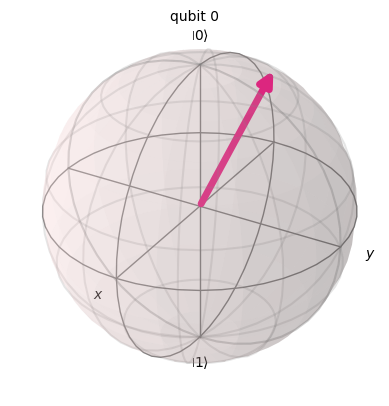

In [6]:
psi=random_statevector(2,52)
print('psi state: {}'.format(psi))

array_to_latex(psi)
plot_bloch_multivector(psi)


In [7]:
def teleportation_circuit():
    # Create a Quantum Circuit
    qubits=QuantumRegister(3,name="q")
    cbits=ClassicalRegister(2,name="c")
    circuit = QuantumCircuit(qubits,cbits)
    
    q0,q1,q2=qubits
    c0,c1=cbits

    # Prepare the state to be teleported
    psi=random_statevector(2,52)
    circuit.initialize(psi, q0)

    circuit.barrier()
    # Create a Bell pair between qubits 1 and 2
    circuit.h(q1)
    circuit.cx(q1, q2)

    circuit.barrier()
    # Entangle qubits 0 and 1
    circuit.h(q0)
    circuit.cx(q0, q1)

    circuit.barrier()
    # Measure qubits 0 and 1
    circuit.measure(q0, c0)
    circuit.measure(q1, c1)

    # Apply a correction to qubit 2
    circuit.x(q2).c_if(c1, 1)
    circuit.z(q2).c_if(c0, 1)

    return circuit

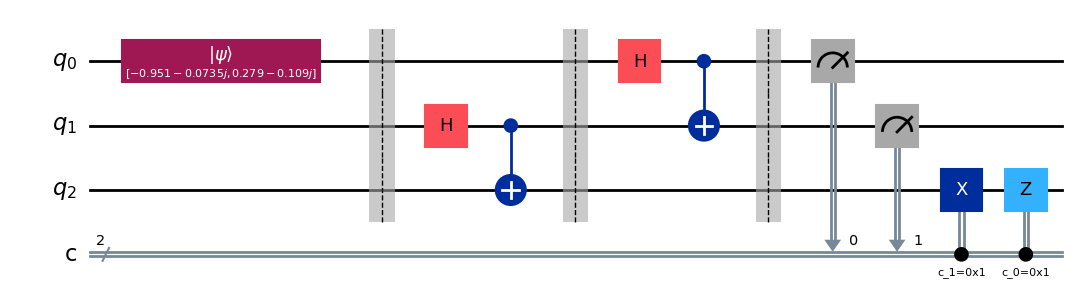

In [8]:
qc=teleportation_circuit()
qc.draw('mpl')

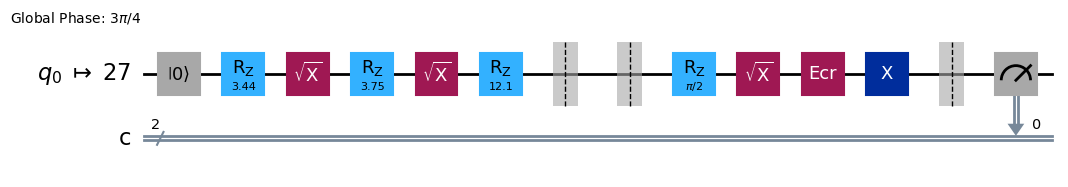

In [9]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target=backend.target
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)

circuit_isa=pm.run(qc)
circuit_isa.draw(output="mpl",idle_wires=False,style="iqp")

In [10]:
# TO run on local simulator:
#1. Use the StatevectorSampler from qiskit.primitves instead
from qiskit.primitives import StatevectorSampler
sampler=Sampler(backend=backend)
#sampler=StatevectorSampler()
sampler.options.default_shots=10_000
result = sampler.run([circuit_isa]).result()
dist = result[0].data.c.get_counts()

C:\Users\nihar\AppData\Local\Temp\ipykernel_8676\246611712.py:4: DeprecationWarning: The 'backend' keyword arguments are deprecated as of qiskit-ibm-runtime 0.24.0 and will be removed no sooner than 3 months after the release date. Please use the 'mode' parameter instead.
  sampler=Sampler(backend=backend)


RuntimeJobFailureError: 'Unable to retrieve job result. Error code 7001; Instruction bfunc is not supported'

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram(dist)

## Superdense coding

## Background
Usage estimate: 4 seconds on ibm_nairobi(NOTE; This is an estimate only. Your runtime may
vary)

In order to demonstrate Quantum teleportation we are required to prepare an entangled and one unknown state. The entangled state is shared between Alice and Bob. The unknown state is held by Alice. The goal is to teleport the unknown state to Bob.

Here, we demonstrate how to construct the teleportation circuit using the gates from the Qiskit library.

### Requirements
Before starting this tutorial, ensure that you have the following installed:
- Qiskit SDK 1.0 or later, with visualization support (pip install 'qiskit[visualization]')
- Qiskit Runtime (pip install qiskit-ibm-runtime) 0.22 or later

## Setup
Here we import the small number of tools we need for this tutorial

In [11]:
#Built-in modules
import math

#imports from Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_distribution

#Imports from Qiskit Runtime
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler

In [12]:
# To run on hardware, selectthe backedn with the fewest number of jobs in the queue
service = QiskitRuntimeService(channel="ibm_quantum")
backend = service.least_busy(operational=True, simulator=False)
backend.name

'ibm_kyoto'

## Step 1: Map classical inputs to a quantum problem

In [13]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_bloch_multivector, array_to_latex
from qiskit.quantum_info import random_statevector
from qiskit.primitives import StatevectorSampler

In [18]:
def superdense_circuit(string):
    # Create a Quantum Circuit
    qubits=QuantumRegister(2,name="q")
    cbits=ClassicalRegister(2,name="c")
    circuit = QuantumCircuit(qubits,cbits)
    
    q0,q1=qubits
    c0,c1=cbits

    # Prepare the state to be teleported
    circuit.h(q0)
    circuit.cx(q0, q1)

    circuit.barrier()

    if string[0]=="1":
        circuit.z(q0)
    if string[1]=="1":
        circuit.x(q0)

    circuit.barrier()
    
    circuit.cx(q0, q1)
    circuit.h(q0)

    circuit.barrier()
    
    circuit.measure(q0, c0)
    circuit.measure(q1, c1)

    return circuit

In [22]:
qc_00=superdense_circuit("00")
qc_01=superdense_circuit("01")
qc_10=superdense_circuit("10")
qc_11=superdense_circuit("11")

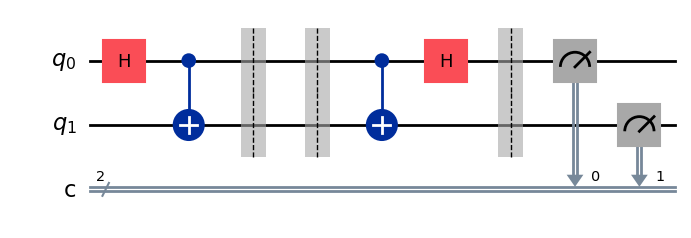

In [23]:
qc_00.draw('mpl')

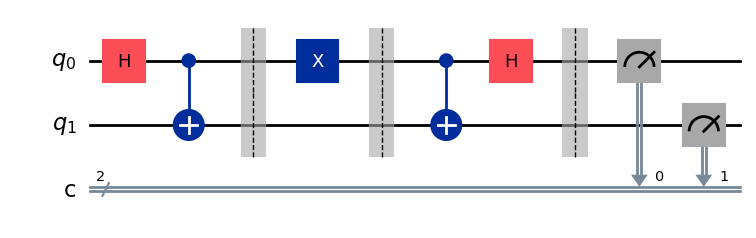

In [24]:
qc_01.draw('mpl')

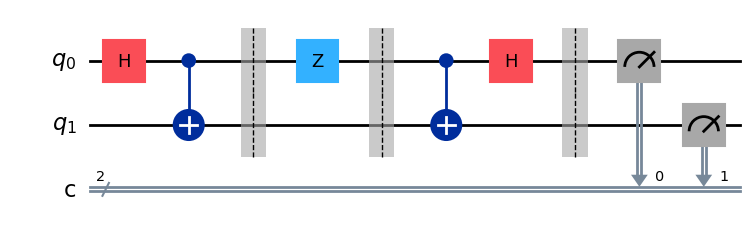

In [25]:
qc_10.draw('mpl')

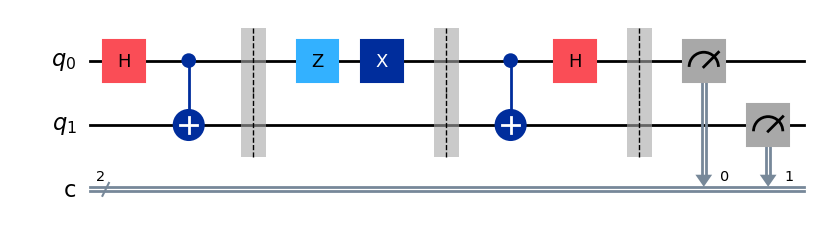

In [27]:
qc_11.draw('mpl')

## Step 2: Optimize problem for quantum execution

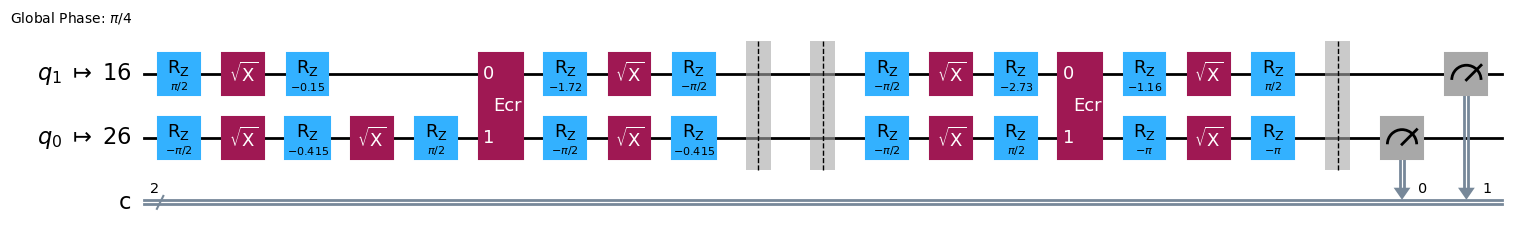

In [28]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target=backend.target
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)

circuit_isa_00=pm.run(qc_00)
circuit_isa_00.draw(output="mpl",idle_wires=False,style="iqp")

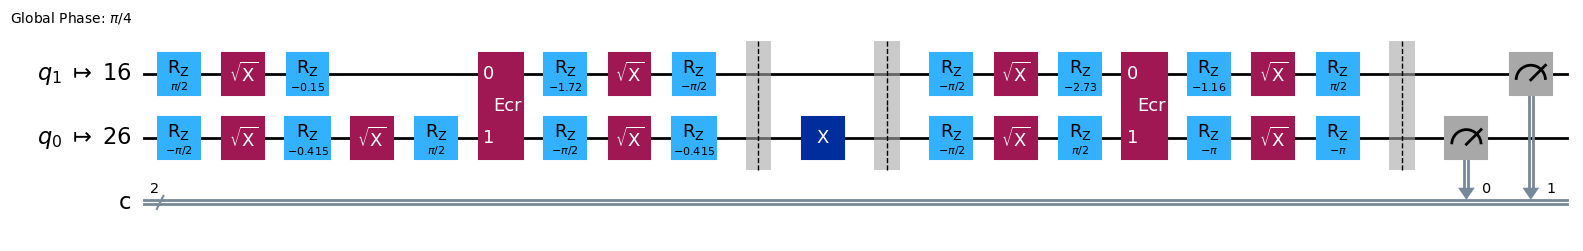

In [29]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target=backend.target
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)

circuit_isa_01=pm.run(qc_01)
circuit_isa_01.draw(output="mpl",idle_wires=False,style="iqp")

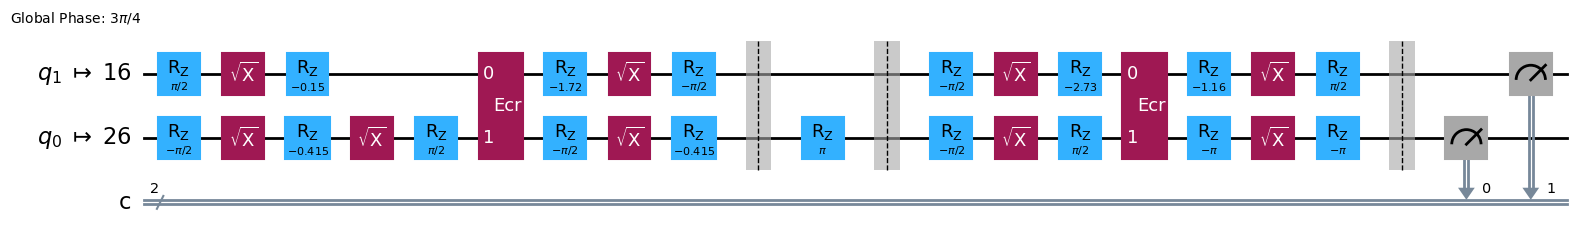

In [30]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target=backend.target
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)

circuit_isa_10=pm.run(qc_10)
circuit_isa_10.draw(output="mpl",idle_wires=False,style="iqp")

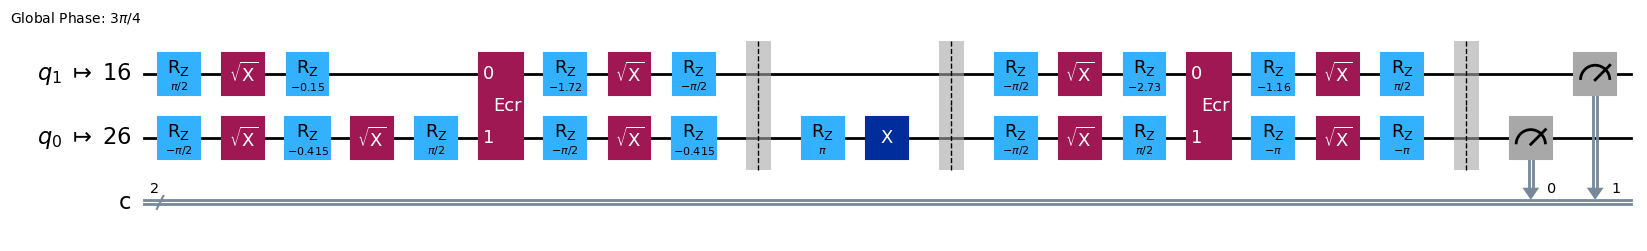

In [31]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target=backend.target
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)

circuit_isa_11=pm.run(qc_11)
circuit_isa_11.draw(output="mpl",idle_wires=False,style="iqp")

## Step 3: Execute using Qiskit Primitives

We are now required to run the circuit and sample the measurements on th first qubit thus for execution we will use the Sampler runtime primitive.

In [32]:
# TO run on local simulator:
#1. Use the StatevectorSampler from qiskit.primitves instead
sampler=Sampler(backend=backend)
sampler.options.default_shots=10_000
result_00 = sampler.run([circuit_isa_00]).result()
dist_00 = result_00[0].data.c.get_counts()

C:\Users\nihar\AppData\Local\Temp\ipykernel_8676\30366168.py:3: DeprecationWarning: The 'backend' keyword arguments are deprecated as of qiskit-ibm-runtime 0.24.0 and will be removed no sooner than 3 months after the release date. Please use the 'mode' parameter instead.
  sampler=Sampler(backend=backend)


In [33]:
# TO run on local simulator:
#1. Use the StatevectorSampler from qiskit.primitves instead
sampler=Sampler(backend=backend)
sampler.options.default_shots=10_000
result_01 = sampler.run([circuit_isa_01]).result()
dist_01 = result_01[0].data.c.get_counts()

C:\Users\nihar\AppData\Local\Temp\ipykernel_8676\973544588.py:3: DeprecationWarning: The 'backend' keyword arguments are deprecated as of qiskit-ibm-runtime 0.24.0 and will be removed no sooner than 3 months after the release date. Please use the 'mode' parameter instead.
  sampler=Sampler(backend=backend)


In [34]:
# TO run on local simulator:
#1. Use the StatevectorSampler from qiskit.primitves instead
sampler=Sampler(backend=backend)
sampler.options.default_shots=10_000
result_10 = sampler.run([circuit_isa_10]).result()
dist_10 = result_10[0].data.c.get_counts()

C:\Users\nihar\AppData\Local\Temp\ipykernel_8676\3799579754.py:3: DeprecationWarning: The 'backend' keyword arguments are deprecated as of qiskit-ibm-runtime 0.24.0 and will be removed no sooner than 3 months after the release date. Please use the 'mode' parameter instead.
  sampler=Sampler(backend=backend)


In [35]:
# TO run on local simulator:
#1. Use the StatevectorSampler from qiskit.primitves instead
sampler=Sampler(backend=backend)
sampler.options.default_shots=10_000
result_11 = sampler.run([circuit_isa_11]).result()
dist_11 = result_11[0].data.c.get_counts()

C:\Users\nihar\AppData\Local\Temp\ipykernel_8676\2087583879.py:3: DeprecationWarning: The 'backend' keyword arguments are deprecated as of qiskit-ibm-runtime 0.24.0 and will be removed no sooner than 3 months after the release date. Please use the 'mode' parameter instead.
  sampler=Sampler(backend=backend)


## Step 4: Post-Process, reutrn result in Classical format

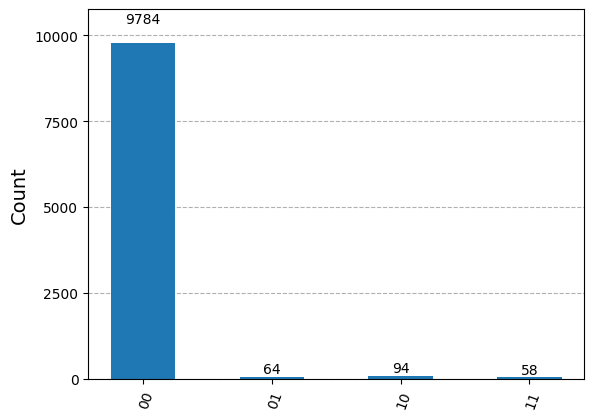

In [37]:
from qiskit.visualization import plot_histogram
plot_histogram(dist_00)

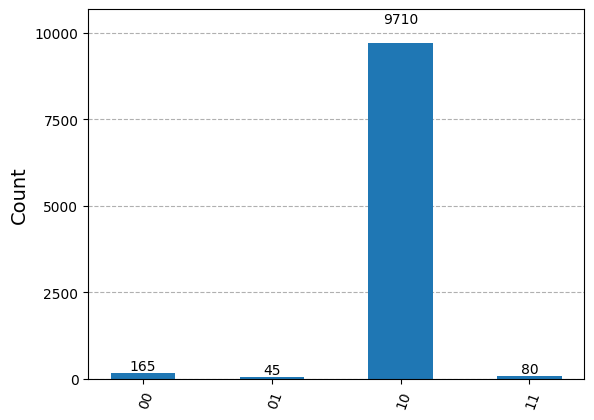

In [38]:
plot_histogram(dist_01)

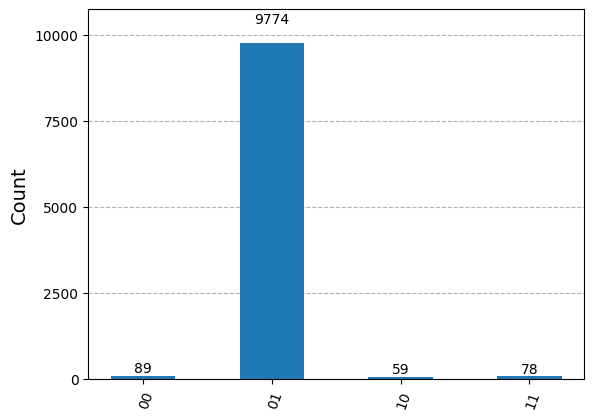

In [39]:
plot_histogram(dist_10)

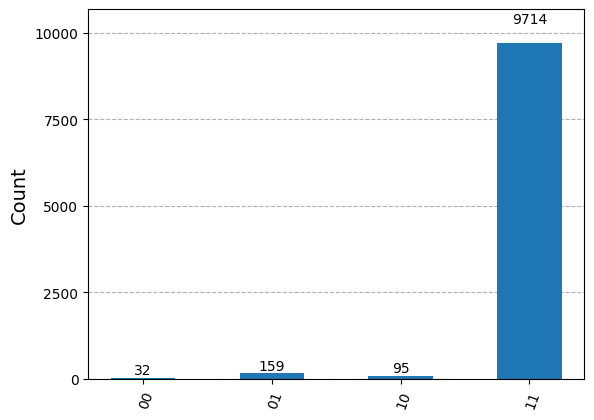

In [40]:
plot_histogram(dist_11)